# Introduction


<h4>Problem statement</h4> 
<br>
<p> The problem we have chosen to model is the Black Friday Purchase Problem in which the objective is to predict the purchase price after being given a variety of categorical and quantative variables. </p>


<h4>Background/Data Breakdown</h4>
<br>

<p> Black Friday is one of the biggest phenomena in the United States and companies for years have been trying to build an effective model in order to release targeted ads to consumers based on previous consumer knowledge. The uniqueness of the problem and the significance of it to the consumer market is what really drove us towards attempting to crack this problem. The data was taken from a machine learning challenge on datahack.com, and it is extremely well maintained. There are 550,000 rows and 13 columns filled with interesting variables such as marital status, gender, stay_in_city, occupation, etc. The data has a unique row id, and then also contains what essentially acts as a foreign key reference with the variables user_id and product_id. These variables are very useful for Exploratory Data Analysis and could potentially help with feature engineering down the road. 

<h4>Questions and Types of Learning</h4>
<br>

<p>The learning that we have chosen for this task is supervised learning and within the umbrella of supervised learning we have decided to go for a regression approach since we are trying to predict the purchase amount of a given sale. The two types of regression that we have decided to go with is OLS(Ordinary Least Squares) and the regression variant of the Decision Tree Classifier. The captural all measure, P, that we are using to determine out performance is RMSE(Root Mean Squared Error) which takes the difference between the observed and expected for each data point and then finds the mean of the difference, squares it, and takes the square root. This helps to identify how close and correct the models predictions are.
</p>


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from scipy import sparse
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
'''
Initial reading of the training data set in order to see columns
'''

table = pd.read_csv("train.csv")
table.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
'''
Converting the initial training sets categorical variables into dummy variables
'''

finalLearningMatrix = pd.get_dummies(table, columns = ["Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years",
                                                                    "Marital_Status","Product_Category_1","Product_Category_2",
                                                                    "Product_Category_3"],sparse = True)

In [4]:
'''
Setting table_purchase in order to create labels set
'''
table_purchase = table["Purchase"]

In [5]:
'''
Doing the initial splitting of the data set into training and testing
'''
train, test, train_labels, test_labels = train_test_split(finalLearningMatrix, table_purchase, test_size = .3)

In [6]:
'''
Dropping these two features initially in order to establish baseline 
performance as we are trying to predict Purchase Amount" 
'''
train = train.drop(columns =["Purchase","Product_ID"])
test = test.drop(columns =["Purchase","Product_ID"])

In [7]:
'''
Linear Regression is our first chosen model
'''

lm = linear_model.LinearRegression()

In [8]:
'''
Fitting the model with the training set and labels
and then creating predictions
'''

model = lm.fit(train,train_labels)
predictions = lm.predict(test)

In [9]:
'''
Model score for the training set
Should be a bit higher I think
'''
model.score(train,train_labels)

0.648023109206612

In [10]:
'''
Model score for the test labels
Very encouraging performance
'''
model.score(test,test_labels)

0.6475401218195727

Text(0, 0.5, 'Actual')

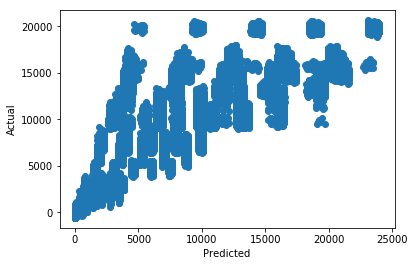

In [11]:
plt.scatter(test_labels,predictions)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [12]:
'''
Standard Deviations of the test labels
RMSE should be less than this
'''
test_labels.std()

5023.076681975689

In [13]:
'''
The root mean squared error of our model on the test labels
This is encouraging
'''
np.sqrt(mean_squared_error(predictions, test_labels))

2982.1077790815484

In [14]:
'''
Reading the data with only purchase dropped this time. We keep the product_ID
This shouldnt be too big of an issue because we are trying to find total purchase amount
not individual product price
'''
table3 = pd.read_csv("train.csv")
table3 = table3.drop(columns =["Product_Category_2","Product_Category_3"])
noNullID = pd.get_dummies(table3, columns = ["Gender","Age","Occupation","City_Category",
                                          "Stay_In_Current_City_Years","Marital_Status",
                                          "Product_Category_1","Product_ID"],sparse = True)
table_purchase3 = noNullID["Purchase"]
train3, test3, train_labels3, test_labels3 = train_test_split(noNullID, table_purchase3, test_size = .3)
train3 = train3.drop(columns =["Purchase"])
test3 = test3.drop(columns =["Purchase"])
            

In [15]:
'''
Making sure training set was created correctly
'''
train3.head()

,User_ID,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Product_ID_P0098942,Product_ID_P0099042,Product_ID_P0099142,Product_ID_P0099242,Product_ID_P0099342,Product_ID_P0099442,Product_ID_P0099642,Product_ID_P0099742,Product_ID_P0099842,Product_ID_P0099942
358658,1001246,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54737,1002367,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
371300,1003227,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
332421,1003261,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
70913,1004884,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
type(train3)

pandas.core.frame.DataFrame

In [17]:
'''
Creating Sparse matrices for efficiency purposes
'''
import scipy
sparseTrain = scipy.sparse.csr_matrix(train3.values)
sparseTest = scipy.sparse.csr_matrix(test3.values)

In [18]:
'''
Making another regression model for our new sets 
with added features
'''
reg3 = linear_model.LinearRegression()

In [19]:
'''
Running OLS with addition of product_id as a feature
'''
model2 = reg3.fit(sparseTrain,train_labels3)
predictions2 = reg3.predict(sparseTest)
model2.score(sparseTest,test_labels3)

0.6640815375283785

In [20]:
'''
Measurement of RMSE for this new model
'''
np.sqrt(mean_squared_error(predictions2, test_labels3))

2906.8805217425556

In [21]:
from sklearn import tree

In [22]:
'''
Trying a different sort of regression model
Decision Tree Regression. 
'''
 
Decision_Model = tree.DecisionTreeRegressor()
Decision_Model.fit(sparseTrain, train_labels3)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [23]:
Decision_Model.score(sparseTrain,train_labels3)

1.0

In [24]:
'''
Predicting with the decision tree model
'''
predicted_Decision = Decision_Model.predict(sparseTest)

In [25]:
'''
Finding the model score/R^2
'''
Decision_Model.score(sparseTest,test_labels3)

0.5296051793206842

In [26]:
'''
RMSE of Decision Tree
'''
np.sqrt(mean_squared_error(predicted_Decision, test_labels3))

3439.865885743178

In [27]:
test_labels.std()

5023.076681975689

In [28]:
'''
Dropping User_ID in order to see if this makes a difference
in model performance
'''

table4 = pd.read_csv("train.csv")
table4 = table4.drop(columns =["Product_Category_2","Product_Category_3"])
noNullID = pd.get_dummies(table4, columns = ["Gender","Age","Occupation","City_Category",
                                          "Stay_In_Current_City_Years","Marital_Status",
                                          "Product_Category_1","Product_ID"],sparse = True)
table_purchase4 = noNullID["Purchase"]
train4, test4, train_labels4, test_labels4 = train_test_split(noNullID, table_purchase4, test_size = 0.3)
train4 = train4.drop(columns =["Purchase", "User_ID"])
test4 = test4.drop(columns =["Purchase", "User_ID"])
        

In [29]:
test4.head()

,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,...,Product_ID_P0098942,Product_ID_P0099042,Product_ID_P0099142,Product_ID_P0099242,Product_ID_P0099342,Product_ID_P0099442,Product_ID_P0099642,Product_ID_P0099742,Product_ID_P0099842,Product_ID_P0099942
79537,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2968,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232505,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
447139,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
348104,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
'''
Creating sparse matrices
'''
import scipy
sparseTrain = scipy.sparse.csr_matrix(train4.values)
sparseTest = scipy.sparse.csr_matrix(test4.values)

In [31]:
'''
Setting up linear regression model
'''
reg4 = linear_model.LinearRegression()

In [32]:
'''
Fitting the model and finding the R^2
It went up when User_ID was thrown out as a feature!!!
'''
model7 = reg4.fit(sparseTrain,train_labels4)
predictions7 = reg4.predict(sparseTest)
model7.score(sparseTest,test_labels4)

0.7174659503972384

In [51]:
import statsmodels.api as sm
from statsmodels.api import OLS

In [ ]:
# OLS(np.asarray(train_labels4), np.asarray(train4)).fit().summary()

In [33]:
'''
RMSE
'''
np.sqrt(mean_squared_error(predictions7, test_labels4))

2671.304088629652

In [34]:
'''
Running Tree regression with the new feature 
to see if anything else has changed
Score is for training
'''
Decision_Model2 = tree.DecisionTreeRegressor()
# Train the model using the training sets and check score
Decision_Model2.fit(sparseTrain, train_labels4)
Decision_Model2.score(sparseTrain, train_labels4)

0.969986833016741

In [35]:
'''
Score for testing
'''
Decision_Model2.score(sparseTest,test_labels4)

0.5160003800765625

In [36]:
predictedDecision3 = Decision_Model2.predict(sparseTest)

In [37]:
'''
RMSE for new model
'''
np.sqrt(mean_squared_error(predictedDecision3, test_labels4))

3496.314102996026

# Disclaimer as to why there are no extensive summary statistics
<br>
<p>We attempted to run summary statistics on our OLS regressions, but we were unable to get the coefficients of variables in order to perform significance testing and estimate the partial effects. This occured because scikit learn does not have a metrics package for its regression, so we attempted to use STATS MODELS but that package didn't accept scipy sparse matrices as a parameter so it was unable to run on the given computing power </p>

# Description of Machine Learning Process (Code Above)

<h4>Data Processing</h4>
<br>
<p>We dropped Product Category 2 and 3 because of the large amount of Null values present in this that was throwing off our categorical variables. We then used Pandas.get_dummies to convert all categorical variables to dummy variables in order make it conducive to regressions. We then split into a training and testing set as well as training and testing labels.</p>

<h4>Model 1: OLS with Product_ID dropped</h4>
<br>

<p>In this first model we used OLS to run a linear regression on the data set which had Product_ID dropped. Our model score was .648 which means that the R^2 coefficient wa .648. This means that 64.8 % of the variation in the purchase price can be explained by the dependent variables. Additionally, the RMSE for this model was 2,891 which seems like a large amount, but in the context of the standard deviation for the test labels which was 5030 this is an excellent RMSE. The goal from here is to hopefully reduce the RMSE by feature engineering</p>


<h4>Model 2: OLS with Product_ID Added</h4>
<br>

<p>In this second model we used OLS to run a linear regression on the data set which had Product_ID added back in. Although this may seem counterintuitive in that product id usually determines the price this was not the case with our data set because data had been agglomerated over the period of a couple years which meant that products were markdown differently over different years. Our model score was .665 which means that the R^2 coefficient was .665. This means that 66.5 % of the variation in the purchase price can be explained by the dependent variables. This was a slight step up from our previous R^2 of .64, so this was a success for the most part. Additionally, the RMSE for this model was 2,908 which seems like a large amount, but in the context of the standard deviation for the test labels which was 5030 this is an excellent RMSE. The goal from here is to hopefully reduce the RMSE by feature engineering</p>

<h4>Model 3: DecisionTreeRegressor with Product_ID Added</h4>
<br>

<p>In this third model we used a DecisionTreeRegressor to run a regression on the data set which had Product_ID added back in. Our model score was .533. This was a significant step down from Model 2's R^2 of .66, so this was a success for the most part. Additionally, the RMSE for this model was 3,432 which seems like a large amount, but in the context of the standard deviation for the test labels which was 5022 this is an excellent RMSE. However, this was a significant step down from out RMSE of 2,891 which we achieved in model 1. </p>

<h4>Model 4: OLS with Product_ID Added, User_ID Dropped</h4>
<br>

<p>In this fourth model we used OLS to run a regression on the data set which had the User_ID dropped. Our model score was .724. This was a significant step up from both Model 1 and 2, so this was a success. Additionally, the RMSE for this model was 2,676 which was our lowest RMSE yet, but in the context of the standard deviation for the test labels which was 5022 this is an excellent RMSE. </p>

# Why it matters?

Creating a machine learning model that can accurately predict the purchase amount from data about the buyer can be very useful for comapnies. Since the data we are analyzing is from black friday sales, the biggest shopping day in the US, it can better inform companies how much people are willing to pay for a certain product based on information about them. Since a lot of the categorical data we had was masked, we cant exactly specify which types of products people are willing to spend on. However, since the organization who realeased this data does know what the masked values map to, this information can be used to effectively target certain groups of people based on the products and purchase amount. 

This can help companies determine how much to markdown the product, while still being able to make the most money. Marking down the products to aggressivly or not aggressivly enough can lead to high losses for the company. This is to big of a risk to take, especially during Black Friday when people are most likely to splurge on shopping. This information can also help companies target certain groups of customers more effectively based on their willingness to pay. By having better targeted ad campaigns, companies can expect sales to go up since the right customers become more aware of the products and sales happening. 

Another big benefit this model could provide companies insight on which products to stock up on for big sale events. By figuring out which product types have a lot of customers wanting to buy them and their willingess to pay for these products, companies can select the product mix that would maximize profits for them. This would also increase 
customer satisfaction, as it would look like the companies know exactly what the customers want and how much they want to spend on it. Which would provide many benefits in the long run.  


